In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset - uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df = df.drop('id', axis = 1)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

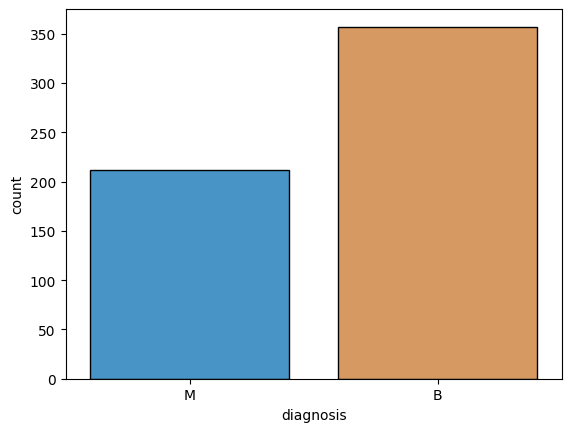

In [8]:
sns.countplot(x='diagnosis', data=df, palette=["#3498DB", "#EB984E"], edgecolor='black')

In [9]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

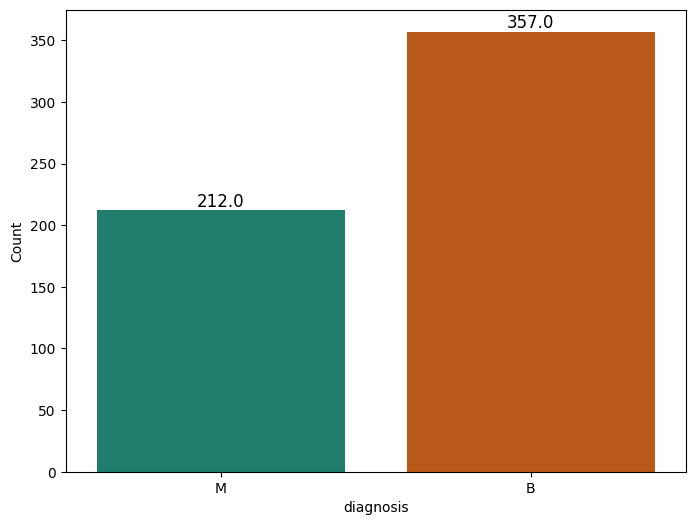

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette=['#138D75', '#D35400'])

# annotate thr bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)
    
plt.ylabel('Count')

plt.show()

In [11]:
x = df.drop('diagnosis', axis=1)
y = df[['diagnosis']]

In [12]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Train Test Split

In [13]:
 from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


In [16]:
xtrain.shape

(398, 30)

In [17]:
xtest.shape

(171, 30)

In [18]:
ytest.shape

(171, 1)

In [19]:
print(x.shape, y.shape)

(569, 30) (569, 1)


In [20]:
print(xtest.shape, ytest.shape)

(171, 30) (171, 1)


In [21]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


# Decision tree model and evaluation

In [22]:
dt_model = DecisionTreeClassifier(random_state=1)

In [23]:
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [24]:
y_pred = dt_model.predict(xtest)

In [25]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Decision tree model performance

In [26]:
print('Decision Tree Model Performance')
print("Accuracy: ", accuracy_score(ytest, y_pred), '\n')
print("Classification Report: ")
print(classification_report(ytest, y_pred))

Decision Tree Model Performance
Accuracy:  0.935672514619883 

Classification Report: 
              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



# Random Forest Model and Evaluation

In [27]:
rf_model = RandomForestClassifier(random_state=42)

In [28]:
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [29]:
y_pred_rf = rf_model.predict(xtest)

In [30]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Random Forest model performance

In [31]:
print("\nRandom Forest Model Performance: ")
print("Accuracy: ", accuracy_score(ytest, y_pred_rf))
print("Classification Report: ")
print(classification_report(ytest, y_pred_rf))


Random Forest Model Performance: 
Accuracy:  0.9707602339181286
Classification Report: 
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Pre - Pruning for Cost Complexity

# Initialized Hypermeter

In [32]:
# Define Hyperparameter for Decision Tree
dt_parameter = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 15, 20, 25, 28],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 810],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Define Hyperparameter for Random Forest

rf_parameter = {
    'n_estimators': [101, 151, 201, 251, 301],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10, 15, 20, 25, 28],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 810],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt' , 'log2']
}

In [33]:
# Performe Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                             param_grid=dt_parameter, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 15, 20, 25, 28],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 810],
                         'splitter': ['best', 'random']})

In [34]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00720806, 0.00200057, 0.00685649, ..., 0.00207396, 0.00160055,
        0.00178952]),
 'std_fit_time': array([9.72571584e-04, 2.13248060e-07, 6.95992787e-04, ...,
        1.47368944e-04, 4.90212867e-04, 3.95242534e-04]),
 'mean_score_time': array([0.00200038, 0.00200038, 0.0019455 , ..., 0.0019021 , 0.00200033,
        0.00181112]),
 'std_score_time': array([4.10190833e-07, 9.53674316e-08, 1.09791795e-04, ...,
        1.97531599e-04, 3.01578299e-07, 4.06391461e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 28, 28, 28],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 4, 4,

In [35]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)

In [36]:
tuning_result_dt_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007208,9.725716e-04,0.002000,4.101908e-07,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,742
1,0.002001,2.132481e-07,0.002000,9.536743e-08,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,178
2,0.006856,6.959928e-04,0.001945,1.097918e-04,gini,None,1,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,742
3,0.002103,2.044920e-04,0.001914,1.846940e-04,gini,None,1,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9500,0.9000,0.9625,0.924051,0.949367,0.937184,0.022400,7
4,0.006797,7.536223e-04,0.002000,0.000000e+00,gini,None,1,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.924051,0.912152,0.017321,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.002001,1.784161e-07,0.002000,1.784161e-07,entropy,28,4,6,random,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,269
1116,0.006201,4.000425e-04,0.002120,2.366066e-04,entropy,28,4,7,best,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,21
1117,0.002074,1.473689e-04,0.001902,1.975316e-04,entropy,28,4,7,random,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,269
1118,0.001601,4.902129e-04,0.002000,3.015783e-07,entropy,28,4,810,best,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,961


In [37]:
tuning_result_dt_gs.shape

(1120, 18)

In [38]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [39]:
tuning_result_dt_gs.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
696,0.006602,4.899209e-04,0.002000,2.780415e-07,entropy,4,2,7,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
694,0.006597,4.863391e-04,0.002005,9.492054e-06,entropy,4,2,6,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
692,0.006118,6.745401e-04,0.002001,5.091228e-07,entropy,4,2,5,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
690,0.005798,7.521741e-04,0.002400,4.900182e-04,entropy,4,2,4,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
688,0.006601,4.898819e-04,0.002001,1.784161e-07,entropy,4,2,3,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
686,0.006373,4.482886e-04,0.002163,3.090452e-04,entropy,4,2,2,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
451,0.002000,6.843901e-07,0.002001,7.921814e-07,gini,25,1,3,random,"{'criterion': 'gini', 'max_depth': 25, 'min_sa...",0.9500,0.9,0.9625,0.924051,0.949367,0.937184,0.022400,7
225,0.001801,4.003772e-04,0.002000,9.464947e-07,gini,8,1,2,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.9500,0.9,0.9625,0.911392,0.962025,0.937184,0.026344,7
339,0.002001,1.519907e-06,0.002000,1.654563e-06,gini,15,1,3,random,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.9500,0.9,0.9625,0.924051,0.949367,0.937184,0.022400,7
283,0.002200,4.001618e-04,0.002001,1.507891e-07,gini,10,1,3,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.9500,0.9,0.9625,0.924051,0.949367,0.937184,0.022400,7


In [40]:
tuning_result_dt_gs.nsmallest(1, 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
686,0.006373,0.000448,0.002163,0.000309,entropy,4,2,2,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.975,0.949367,0.936709,0.939715,0.024205,1


# Evaluate the optimized Model

In [41]:
y_pred_dt_gs = dt_grid_search.predict(xtest)
print('\nDecision Tree Grid Search Performance: ')
print("Accuracy: ", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report: ")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance: 
Accuracy:  0.9532163742690059
Classification Report: 
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Random Forest Grid Search

# Hyperparameter Optimization using Randomized Search

In [42]:
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                               param_distributions=dt_parameter, n_iter=100,cv=5, random_state=42)

In [43]:
dt_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              810],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [44]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.00239706, 0.00200057, 0.00180454, 0.00200038, 0.00700159,
        0.00160046, 0.00460095, 0.00180035, 0.00579877, 0.00620074,
        0.00140047, 0.00379982, 0.00645781, 0.00206456, 0.00200052,
        0.00439982, 0.00180039, 0.00651712, 0.0019443 , 0.00180054,
        0.00140038, 0.00160027, 0.00200739, 0.00405955, 0.00200052,
        0.00209608, 0.00206208, 0.0066565 , 0.00198231, 0.00599637,
        0.00200043, 0.00180039, 0.00160179, 0.00140038, 0.00585313,
        0.004     , 0.00180211, 0.00654602, 0.00180035, 0.00200052,
        0.00154543, 0.00140777, 0.00210156, 0.00200057, 0.00600033,
        0.00619583, 0.00200038, 0.00203934, 0.00139947, 0.00200043,
        0.00599618, 0.00160046, 0.00620046, 0.00160508, 0.00200205,
        0.0061986 , 0.00661612, 0.00400534, 0.00200062, 0.0062006 ,
        0.00585656, 0.00200057, 0.00200043, 0.00660057, 0.00640073,
        0.00199351, 0.00440116, 0.00160527, 0.00180049, 0.00200043,
        0.00634398, 0.00200057,

In [45]:
tuining_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)

In [46]:
tuining_result_dt_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002397,4.886311e-04,0.002503,4.476760e-04,random,4,2,8,gini,"{'splitter': 'random', 'min_samples_split': 4,...",0.8750,0.8750,0.9625,0.936709,0.911392,0.912120,0.034348,59
1,0.002001,2.611745e-07,0.001800,4.000665e-04,random,3,4,2,gini,"{'splitter': 'random', 'min_samples_split': 3,...",0.9125,0.8375,0.9500,0.886076,0.924051,0.902025,0.038247,74
2,0.001805,4.021463e-04,0.001996,8.133394e-06,random,7,1,20,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9375,0.8875,0.9625,0.949367,0.886076,0.924589,0.031865,34
3,0.002000,1.784161e-07,0.002001,2.336015e-07,random,7,4,25,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,14
4,0.007002,6.324851e-04,0.002000,1.907349e-07,best,4,2,28,gini,"{'splitter': 'best', 'min_samples_split': 4, '...",0.9125,0.9125,0.9250,0.949367,0.886076,0.917089,0.020535,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001800,4.001618e-04,0.002000,2.431402e-07,best,810,1,10,gini,"{'splitter': 'best', 'min_samples_split': 810,...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,88
96,0.006332,7.655780e-04,0.001989,2.385044e-05,best,4,2,20,entropy,"{'splitter': 'best', 'min_samples_split': 4, '...",0.9500,0.9000,0.9500,0.936709,0.936709,0.934684,0.018332,2
97,0.006402,4.900766e-04,0.002200,4.000426e-04,best,7,2,6,gini,"{'splitter': 'best', 'min_samples_split': 7, '...",0.9375,0.9000,0.9375,0.949367,0.924051,0.929684,0.016867,11
98,0.002004,8.013135e-06,0.001997,7.793042e-06,random,7,4,6,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9000,0.8750,0.9125,0.949367,0.860759,0.899525,0.030845,78


In [47]:
dt_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'criterion': 'entropy'}

# Perform Random Forest for Decision Tree

In [48]:
# Perform Random Forest for Decision Tree

rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=rf_parameter, n_iter=100, cv=5, random_state=42)

In [49]:
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              810],
                                        'n_estimators': [101, 151, 201, 251,
                                                         301]},
                   random_state=42)

In [50]:
rf_random_search.cv_results_

{'mean_fit_time': array([6.00004196e-04, 9.70725060e-02, 1.91431618e-01, 2.77427959e-01,
        5.94568253e-04, 2.77804232e-01, 3.73277664e-01, 4.00066376e-04,
        1.56482220e-01, 4.00066376e-04, 1.84823275e-01, 4.00066376e-04,
        4.00066376e-04, 2.27533245e-01, 1.29207945e-01, 1.91910744e-01,
        2.34595871e-01, 2.34164190e-01, 6.58678532e-02, 4.00066376e-04,
        2.83880997e-01, 2.38819122e-01, 9.79296207e-02, 2.22034597e-01,
        1.64721966e-01, 1.81973505e-01, 3.50188732e-01, 2.77783680e-01,
        1.91960430e-01, 3.45351934e-01, 1.70950365e-01, 3.11775970e-01,
        2.30720043e-01, 1.26829433e-01, 2.00033188e-04, 1.30830002e-01,
        1.19419098e-01, 1.61233473e-01, 1.67211103e-01, 3.81704426e-01,
        1.71280813e-01, 1.24451971e-01, 4.00114059e-04, 1.61254692e-01,
        4.00018692e-04, 2.00080872e-04, 3.17988729e-01, 2.18202925e-01,
        2.47788382e-01, 2.00080872e-04, 4.00161743e-04, 2.00033188e-04,
        2.00033188e-04, 4.00018692e-04, 6.00147

In [51]:
tuning_result_rf_rs = pd.DataFrame(dt_random_search.cv_results_)

In [52]:
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002397,4.886311e-04,0.002503,4.476760e-04,random,4,2,8,gini,"{'splitter': 'random', 'min_samples_split': 4,...",0.8750,0.8750,0.9625,0.936709,0.911392,0.912120,0.034348,59
1,0.002001,2.611745e-07,0.001800,4.000665e-04,random,3,4,2,gini,"{'splitter': 'random', 'min_samples_split': 3,...",0.9125,0.8375,0.9500,0.886076,0.924051,0.902025,0.038247,74
2,0.001805,4.021463e-04,0.001996,8.133394e-06,random,7,1,20,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9375,0.8875,0.9625,0.949367,0.886076,0.924589,0.031865,34
3,0.002000,1.784161e-07,0.002001,2.336015e-07,random,7,4,25,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,14
4,0.007002,6.324851e-04,0.002000,1.907349e-07,best,4,2,28,gini,"{'splitter': 'best', 'min_samples_split': 4, '...",0.9125,0.9125,0.9250,0.949367,0.886076,0.917089,0.020535,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001800,4.001618e-04,0.002000,2.431402e-07,best,810,1,10,gini,"{'splitter': 'best', 'min_samples_split': 810,...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,88
96,0.006332,7.655780e-04,0.001989,2.385044e-05,best,4,2,20,entropy,"{'splitter': 'best', 'min_samples_split': 4, '...",0.9500,0.9000,0.9500,0.936709,0.936709,0.934684,0.018332,2
97,0.006402,4.900766e-04,0.002200,4.000426e-04,best,7,2,6,gini,"{'splitter': 'best', 'min_samples_split': 7, '...",0.9375,0.9000,0.9375,0.949367,0.924051,0.929684,0.016867,11
98,0.002004,8.013135e-06,0.001997,7.793042e-06,random,7,4,6,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9000,0.8750,0.9125,0.949367,0.860759,0.899525,0.030845,78


In [53]:
tuning_result_rf_rs.shape

(100, 18)

In [54]:
rf_random_search.best_params_

{'n_estimators': 201,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

# Evaluate the optimized models for Randomized Search

# Decision tree Randomized Search

In [55]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("Decision Tree Randomized Search Performance: ")
print("Accuracy: ", accuracy_score(ytest, y_pred_dt_rs))
print('Classification Report: ')
print(classification_report(ytest, y_pred_dt_rs))

Decision Tree Randomized Search Performance: 
Accuracy:  0.9532163742690059
Classification Report: 
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Random Forest Randomized Search

In [56]:
y_pred_rf_rs = rf_random_search.predict(xtest)

In [57]:
print("\nRandom Forest Randomized Forest Performance: ")
print("Accuracy: ", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Resport: ")
print(classification_report(ytest, y_pred_rf_rs))


Random Forest Randomized Forest Performance: 
Accuracy:  0.9707602339181286
Classification Resport: 
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Post Pruning for Decision tree

In [58]:
dt_clf = dt_random_search.best_estimator_

In [59]:
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
                       random_state=42)

In [60]:
from sklearn import tree

[Text(0.59375, 0.9, 'concave points_mean <= 0.051\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.3125, 0.7, 'radius_worst <= 16.83\nentropy = 0.299\nsamples = 245\nvalue = [232, 13]'),
 Text(0.1875, 0.5, 'area_se <= 48.7\nentropy = 0.151\nsamples = 230\nvalue = [225, 5]'),
 Text(0.125, 0.3, 'texture_worst <= 30.145\nentropy = 0.101\nsamples = 227\nvalue = [224, 3]'),
 Text(0.0625, 0.1, 'entropy = 0.0\nsamples = 197\nvalue = [197, 0]'),
 Text(0.1875, 0.1, 'entropy = 0.469\nsamples = 30\nvalue = [27, 3]'),
 Text(0.25, 0.3, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4375, 0.5, 'texture_mean <= 16.19\nentropy = 0.997\nsamples = 15\nvalue = [7, 8]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.3, 'texture_se <= 1.378\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(0.4375, 0.1, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5625, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.7, 'perimeter_wor

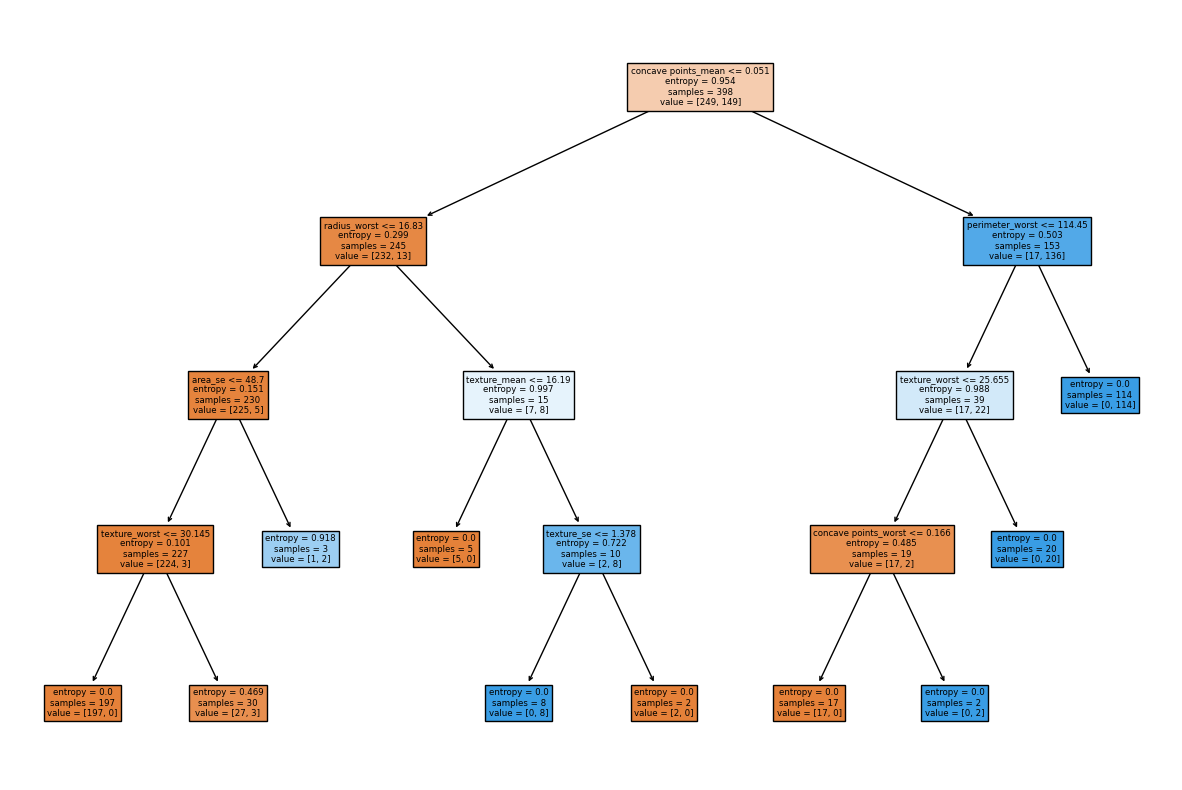

In [62]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_clf, filled=True, feature_names=x.columns)

In [63]:
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain)

In [64]:
ccp_alpha_value = pruning_path.ccp_alphas

In [65]:
ccp_alpha_value

array([0.        , 0.0181389 , 0.01942863, 0.02249811, 0.02254598,
       0.02317526, 0.05933369, 0.07364967, 0.0966387 , 0.57628768])

In [67]:
clfs_list = []

for c in ccp_alpha_value:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [68]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01813889685646639, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.019428626961936996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.022498112473096667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0225459777507582, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.023175262447669234, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.059333693848085844, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.073649668769294, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.09663869999075987, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.5762876765620236, random_state=42)]

In [69]:
training_score = [clf.score(xtrain, ytrain) for clf in clfs_list]

In [70]:
testing_score = [clf.score(xtest, ytest) for clf in clfs_list]

In [71]:
training_score

[1.0,
 0.9422110552763819,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [72]:
testing_score

[0.9415204678362573,
 0.9298245614035088,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.631578947368421]

In [73]:
import matplotlib.pyplot as plt

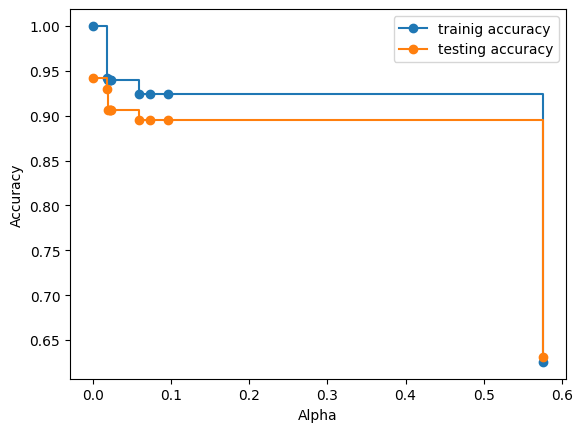

In [75]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')

ax.plot(ccp_alpha_value, training_score, marker='o', label='trainig accuracy', drawstyle='steps-post')
ax.plot(ccp_alpha_value, testing_score, marker='o', label='testing accuracy', drawstyle='steps-post')
ax.legend()

In [81]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [82]:
pred = clf.predict(xtest)

In [83]:
pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [84]:
accuracy_score(ytest, pred)

0.9649122807017544

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

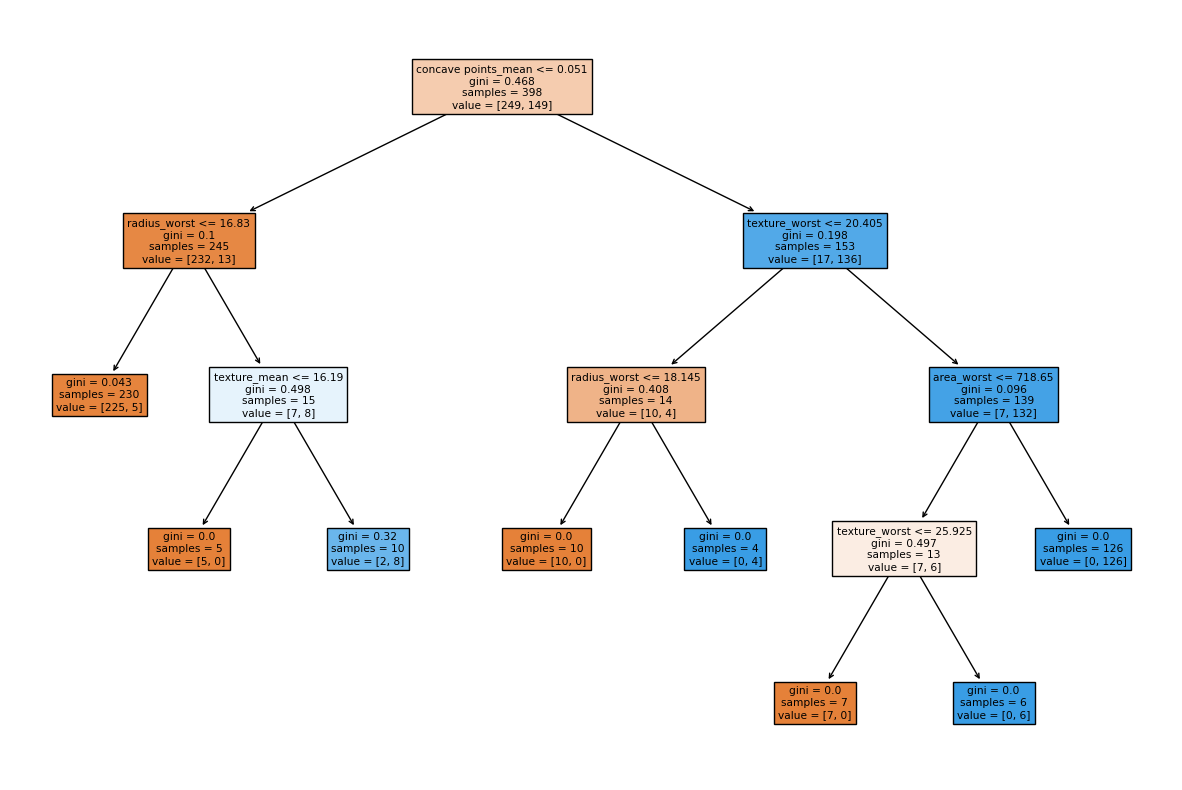

In [85]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=x.columns)